('Age', 'Glucose', 'Insulin')
0.7672413793103449


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


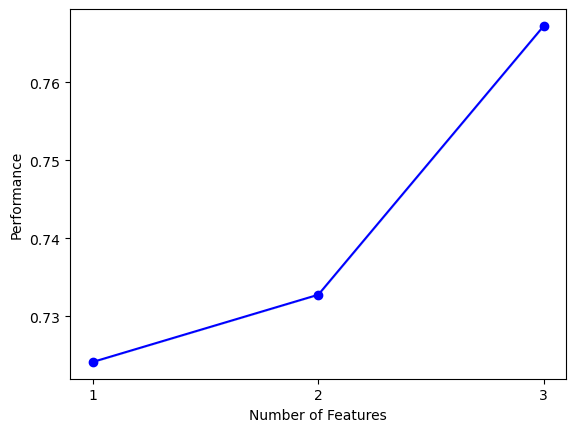

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
          k_features=3,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)
sfs.fit(X, y)

# Print the chosen feature names
# Print a tuple of feature names after 5 features are added
print(sfs.subsets_[3]['feature_names'])

# Print the accuracy of the model after sequential forward selection
# Print the accuracy of the model after 5 features are added
print(sfs.subsets_[3]['avg_score'])

# Plot the model accuracy
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()
